#### https://pandas.pydata.org/pandas-docs/stable/reference/window.html

In [1]:
import pandas as pd
import numpy as np
import MetaTrader5 as mt5
import matplotlib.pyplot as plt

# Interactive plotting
%matplotlib nbagg

# # Window

#### A window in a DataFrame or a Series is a set of rows with specified length.
#### eg. In a DataFrame with 100 row a window of 10 means, 10 rows in each column.

In [2]:
mt5.initialize()

True

In [7]:
# settingup dataset

eurusd = pd.DataFrame(mt5.copy_rates_from_pos('EURUSD', mt5.TIMEFRAME_H1, 0, 144))
eurusd.drop(columns=['spread', 'real_volume'], inplace=True)
eurusd['time'] = pd.to_datetime(eurusd['time'], unit='s')
eurusd.set_index(keys=['time'], inplace=True)
eurusd.head(10)

,open,high,low,close,tick_volume
time,,,,,
2020-07-06 20:00:00,1.13066,1.13190,1.13062,1.13161,2368
2020-07-06 21:00:00,1.13161,1.13178,1.13105,1.13151,2150
2020-07-06 22:00:00,1.13152,1.13160,1.13057,1.13092,2267
2020-07-06 23:00:00,1.13092,1.13128,1.13061,1.13089,983
2020-07-07 00:00:00,1.13090,1.13102,1.12969,1.13098,693
2020-07-07 01:00:00,1.13098,1.13114,1.13082,1.13106,449
2020-07-07 02:00:00,1.13106,1.13144,1.13102,1.13125,720
2020-07-07 03:00:00,1.13125,1.13326,1.13096,1.13265,2660
2020-07-07 04:00:00,1.13265,1.13282,1.13127,1.13132,4820


# # Moving Window Function
# # df.rolling() method.
#### df.rolling() takes a window size and does some calculation on the values in that window and then moves down a row and repeats the calculation, after calculating for all available windows returns a Series.
#### The output is set at the bottom end of window it can be changed by using the center kwarg
#### min_periods kwargs can be set to give the minimum number of windows to apply the calculation.

In [45]:
# Creating Series with empty value
k = pd.Series([1, 2, 3, 4, np.nan])

# Getting rolling count of values in the window
k.rolling(window=2).count()

# Here, the count of last 2 windows is 1 as last window is NaN

0    1.0
1    2.0
2    2.0
3    2.0
4    1.0
dtype: float64

In [18]:
# Calculating 8 window rolling arithmetic-mean on evey column.

eurusd.rolling(window=8).mean()

,open,high,low,close,tick_volume
time,,,,,
2020-07-06 13:00:00,NaN,NaN,NaN,NaN,NaN
2020-07-06 14:00:00,NaN,NaN,NaN,NaN,NaN
2020-07-06 15:00:00,NaN,NaN,NaN,NaN,NaN
2020-07-06 16:00:00,NaN,NaN,NaN,NaN,NaN
2020-07-06 17:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-07-14 08:00:00,1.134335,1.134716,1.133951,1.134270,2077.125
2020-07-14 09:00:00,1.134270,1.134714,1.133883,1.134246,2326.375
2020-07-14 10:00:00,1.134246,1.134638,1.133643,1.134076,2861.625


In [17]:
# Calculating 8 window rolling arithmetic-mean on evey column.
# Setting center=True

eurusd.rolling(window=8, center=True).mean()

,open,high,low,close,tick_volume
time,,,,,
2020-07-06 13:00:00,NaN,NaN,NaN,NaN,NaN
2020-07-06 14:00:00,NaN,NaN,NaN,NaN,NaN
2020-07-06 15:00:00,NaN,NaN,NaN,NaN,NaN
2020-07-06 16:00:00,NaN,NaN,NaN,NaN,NaN
2020-07-06 17:00:00,1.131220,1.132281,1.130578,1.131481,4127.000
...,...,...,...,...,...
2020-07-14 08:00:00,1.134076,1.134768,1.133525,1.134147,3241.625
2020-07-14 09:00:00,1.134146,1.134835,1.133650,1.134281,2844.750
2020-07-14 10:00:00,NaN,NaN,NaN,NaN,NaN


In [10]:
# Calculating rolling sum of 4 consecutive rows in 'close' column

eurusd['close'].rolling(window=4).sum().head(16)

time
2020-07-06 13:00:00        NaN
2020-07-06 14:00:00        NaN
2020-07-06 15:00:00        NaN
2020-07-06 16:00:00    4.52711
2020-07-06 17:00:00    4.52926
2020-07-06 18:00:00    4.52809
2020-07-06 19:00:00    4.52577
2020-07-06 20:00:00    4.52474
2020-07-06 21:00:00    4.52450
2020-07-06 22:00:00    4.52470
2020-07-06 23:00:00    4.52493
2020-07-07 00:00:00    4.52430
2020-07-07 01:00:00    4.52385
2020-07-07 02:00:00    4.52418
2020-07-07 03:00:00    4.52594
2020-07-07 04:00:00    4.52628
Name: close, dtype: float64

In [20]:
# Getting 4 period rolling median.

eurusd.rolling(window=4).median()

,open,high,low,close,tick_volume
time,,,,,
2020-07-06 13:00:00,NaN,NaN,NaN,NaN,NaN
2020-07-06 14:00:00,NaN,NaN,NaN,NaN,NaN
2020-07-06 15:00:00,NaN,NaN,NaN,NaN,NaN
2020-07-06 16:00:00,1.130745,1.132535,1.130460,1.132265,4399.5
2020-07-06 17:00:00,1.132325,1.133190,1.131225,1.132265,4967.5
...,...,...,...,...,...
2020-07-14 08:00:00,1.134265,1.134600,1.133810,1.134040,2036.0
2020-07-14 09:00:00,1.134040,1.134605,1.133810,1.134245,2036.0
2020-07-14 10:00:00,1.134245,1.134605,1.133735,1.134050,2558.5


In [21]:
# Getting 4 period rolling varience.

eurusd.rolling(window=4).var()

,open,high,low,close,tick_volume
time,,,,,
2020-07-06 13:00:00,NaN,NaN,NaN,NaN,NaN
2020-07-06 14:00:00,NaN,NaN,NaN,NaN,NaN
2020-07-06 15:00:00,NaN,NaN,NaN,NaN,NaN
2020-07-06 16:00:00,3.055292e-06,3.314292e-06,2.990733e-06,2.314692e-06,3.722430e+05
2020-07-06 17:00:00,2.387292e-06,1.057367e-06,1.719133e-06,3.492333e-07,9.533302e+05
...,...,...,...,...,...
2020-07-14 08:00:00,6.522500e-08,3.856667e-08,4.462500e-08,9.816667e-08,3.988876e+05
2020-07-14 09:00:00,9.370000e-08,7.502500e-08,2.153333e-08,8.142500e-08,5.666109e+05
2020-07-14 10:00:00,7.695833e-08,4.142500e-08,4.548917e-07,3.712250e-07,2.875983e+06


In [22]:
# Getting 4 period rolling standard-deviation.

eurusd.rolling(window=4).std()

,open,high,low,close,tick_volume
time,,,,,
2020-07-06 13:00:00,NaN,NaN,NaN,NaN,NaN
2020-07-06 14:00:00,NaN,NaN,NaN,NaN,NaN
2020-07-06 15:00:00,NaN,NaN,NaN,NaN,NaN
2020-07-06 16:00:00,0.001748,0.001821,0.001729,0.001521,610.117202
2020-07-06 17:00:00,0.001545,0.001028,0.001311,0.000591,976.386322
...,...,...,...,...,...
2020-07-14 08:00:00,0.000255,0.000196,0.000211,0.000313,631.575477
2020-07-14 09:00:00,0.000306,0.000274,0.000147,0.000285,752.735622
2020-07-14 10:00:00,0.000277,0.000204,0.000674,0.000609,1695.872342


In [24]:
# Getting 4 period rolling correlation between open & close.

eurusd['close'].rolling(window=4).corr(eurusd['open'])

time
2020-07-06 13:00:00         NaN
2020-07-06 14:00:00         NaN
2020-07-06 15:00:00         NaN
2020-07-06 16:00:00    0.759705
2020-07-06 17:00:00    0.305175
                         ...   
2020-07-14 08:00:00   -0.588824
2020-07-14 09:00:00   -0.551249
2020-07-14 10:00:00   -0.479865
2020-07-14 11:00:00   -0.884142
2020-07-14 12:00:00    0.040191
Length: 144, dtype: float64

In [25]:
# Getting 4 period rolling covarience between open & close.

eurusd['close'].rolling(window=4).cov(eurusd['open'])

time
2020-07-06 13:00:00             NaN
2020-07-06 14:00:00             NaN
2020-07-06 15:00:00             NaN
2020-07-06 16:00:00    2.020308e-06
2020-07-06 17:00:00    2.786500e-07
                           ...     
2020-07-14 08:00:00   -4.711667e-08
2020-07-14 09:00:00   -4.815000e-08
2020-07-14 10:00:00   -8.110833e-08
2020-07-14 11:00:00   -4.370333e-07
2020-07-14 12:00:00    3.296667e-08
Length: 144, dtype: float64

In [26]:
# Getting 4 period rolling skew of the window.

eurusd['close'].rolling(window=4).skew()

time
2020-07-06 13:00:00         NaN
2020-07-06 14:00:00         NaN
2020-07-06 15:00:00         NaN
2020-07-06 16:00:00   -1.503629
2020-07-06 17:00:00    0.230260
                         ...   
2020-07-14 08:00:00    0.643243
2020-07-14 09:00:00   -0.929305
2020-07-14 10:00:00   -0.891797
2020-07-14 11:00:00    0.129931
2020-07-14 12:00:00   -0.924115
Name: close, Length: 144, dtype: float64

In [27]:
# Getting 4 period rolling kurtosis.

eurusd['close'].rolling(window=4).kurt()

time
2020-07-06 13:00:00          NaN
2020-07-06 14:00:00          NaN
2020-07-06 15:00:00          NaN
2020-07-06 16:00:00     2.131412
2020-07-06 17:00:00    -4.315500
                         ...    
2020-07-14 08:00:00    11.262606
2020-07-14 09:00:00    17.290203
2020-07-14 10:00:00     0.254702
2020-07-14 11:00:00     0.112043
2020-07-14 12:00:00    -0.093785
Name: close, Length: 144, dtype: float64

#### # While applying a function on a rolling window, pandas will pass a Series to the function by default, set raw = True to send an ndarray insted.

In [30]:
# Defining a Function.
# Returns the percentage difference between last & first values in an iterable.

def random_func(array):
    n1 = array[0]
    n2 = array[-1]
    p_change = ((n2 - n1)/n2) * 100
    return p_change

In [33]:
# applying a UDF on a rolling window in 'close' column.

eurusd['close'].rolling(4).apply(random_func, raw=True)

time
2020-07-06 13:00:00         NaN
2020-07-06 14:00:00         NaN
2020-07-06 15:00:00         NaN
2020-07-06 16:00:00    0.268399
2020-07-06 17:00:00   -0.012370
                         ...   
2020-07-14 08:00:00   -0.006174
2020-07-14 09:00:00    0.007934
2020-07-14 10:00:00   -0.120905
2020-07-14 11:00:00    0.110126
2020-07-14 12:00:00    0.097763
Name: close, Length: 144, dtype: float64

In [37]:
# Getting 4 period rolling mean & sum on close & tick_volume

eurusd.rolling(4).agg({'close': 'mean', 'tick_volume': 'sum'})

,close,tick_volume
time,,
2020-07-06 13:00:00,NaN,NaN
2020-07-06 14:00:00,NaN,NaN
2020-07-06 15:00:00,NaN,NaN
2020-07-06 16:00:00,1.131778,17954.0
2020-07-06 17:00:00,1.132315,20465.0
...,...,...
2020-07-14 08:00:00,1.134095,8507.0
2020-07-14 09:00:00,1.134197,8775.0
2020-07-14 10:00:00,1.133927,11822.0


In [38]:
# Applying UDF with aggrigate.
# Getting 4 period rolling mean & percentage difference on close & tick_volume

eurusd.rolling(4).agg({'close': 'mean', 'tick_volume': random_func})

,close,tick_volume
time,,
2020-07-06 13:00:00,NaN,NaN
2020-07-06 14:00:00,NaN,NaN
2020-07-06 15:00:00,NaN,NaN
2020-07-06 16:00:00,1.131778,25.983653
2020-07-06 17:00:00,1.132315,27.025761
...,...,...
2020-07-14 08:00:00,1.134095,-57.377919
2020-07-14 09:00:00,1.134197,32.322920
2020-07-14 10:00:00,1.133927,71.919771


# # Understanding quantiles

#### A quantile is the dividing line in a series of values. eg. If a set of values from 1 to 100 are to be divided in 4 quarters we will need 3 dividing lines on 3 numeric positions ie. on 25, 50 & 75. This will divide the set in 4 segment.
#### If a set is to be divided in 4 segments it will have 3 quantiles, in 6 segments it will have 5 quantiles, therefore n divisions require n - 1 quantiles.
####  A 50% quantile of a set of values between 100 & 200 will be @ 150

In [33]:
# Getting 25% quantile of the passed Series

pd.Series([0, 25, 50, 75, 100]).quantile(0.25)

25.0

In [31]:
pd.Series([100, 800]).quantile(0.0)

100.0

In [42]:
# Getting 40% quantile value over a rolling window of size 4.
# interpolation kwarg is required  to select when there are 2 possible quantiles

eurusd['close'].rolling(4).quantile(0.4, interpolation='lower')

time
2020-07-06 13:00:00        NaN
2020-07-06 14:00:00        NaN
2020-07-06 15:00:00        NaN
2020-07-06 16:00:00    1.13189
2020-07-06 17:00:00    1.13189
                        ...   
2020-07-14 08:00:00    1.13388
2020-07-14 09:00:00    1.13420
2020-07-14 10:00:00    1.13381
2020-07-14 11:00:00    1.13381
2020-07-14 12:00:00    1.13429
Name: close, Length: 144, dtype: float64

# # Expanding Window Function
# # df.expanding()
#### df.expanding() applies the calculations cummulatively.
#### df.expanding() only requires the minimum periods in a window, after that it just keeps expanding over rows ahead.

In [36]:
# Creating Series with empty value
k = pd.Series([1, 2, 3, 4, 5, 5, np.nan])

# count leaves empty values
k.expanding().count()

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    6.0
dtype: float64

In [37]:
# Sum with minimum 3 rows.

k.expanding(3, center=False, axis=0).sum()

# sum of first 3 rows, after that sum of all the rows above.

0     NaN
1     NaN
2     6.0
3    10.0
4    15.0
5    20.0
6    20.0
dtype: float64

In [ ]:
# Expanding statistical functions.

k.expanding(3).mean()                 # expanding arithmetic mean
k.expanding(3).median()               # expanding median
k.expanding(3).var()                  # expanding varience
k.expanding(3).std()                  # expanding standard-deviation
eurusd['close'].expanding(3).skew()   # expanding skew
eurusd['close'].expanding(3).kurt()   # expanding kurtosis
k.expanding(3).min()                  # minimum value in the expanded window
k.expanding(3).max()                  # max value in the expanded window

eurusd['close'].expanding(3).corr(eurusd['open'])  # expanding correlation between open & close
eurusd['close'].expanding(3).cov(eurusd['open'])   # expanding covarience between open & close

In [39]:
# Defining a Function.
# Returns the percentage difference between last & first values in an iterable.

def random_func(array):
    n1 = array[0]
    n2 = array[-1]
    p_change = ((n2 - n1)/n2) * 100
    return p_change

In [52]:
# applying function over a expanded window.

k.expanding(2).apply(random_func, raw=True)

0          NaN
1    50.000000
2    66.666667
3    75.000000
4    80.000000
5    80.000000
dtype: float64

In [40]:


eurusd.expanding(3).agg({'close': random_func, 'tic_volume': 'mean'})

c:\program files\python37\lib\site-packages\pandas\core\window.py:2117: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


close                                            \
                         open      high       low     close tick_volume   
time                                                                      
2020-07-06 20:00:00       NaN       NaN       NaN       NaN         NaN   
2020-07-06 21:00:00       NaN       NaN       NaN       NaN         NaN   
2020-07-06 22:00:00  0.076004 -0.026511 -0.004423 -0.061012   -4.455227   
2020-07-06 23:00:00  0.022990 -0.054805 -0.000884 -0.063667 -140.895219   
2020-07-07 00:00:00  0.021222 -0.077806 -0.082323 -0.055704 -241.702742   
...                       ...       ...       ...       ...         ...   
2020-07-14 15:00:00  0.625780  0.539524  0.503370  0.489808   56.843448   
2020-07-14 16:00:00  0.573348  0.653010  0.484980  0.643581   73.479673   
2020-07-14 17:00:00  0.726992  0.759276  0.692139  0.728999   74.962994   
2020-07-14 18:00:00  0.812338  0.769716  0.761871  0.783832   69.819016   
2020-07-14 19:00:00  0.866256  0.769716  0.843682  0.767302  -51.116784   

                              tic_volume                                \
                        8_EMA       open      high       low     close   
time                                                                     
2020-07-06 20:00:00       NaN        NaN       NaN       NaN       NaN   
2020-07-06 21:00:00       NaN        NaN       NaN       NaN       NaN   
2020-07-06 22:00:00 -0.028483   1.131263  1.131760  1.130747  1.131347   
2020-07-06 23:00:00 -0.040812   1.131177  1.131640  1.130713  1.131232   
2020-07-07 00:00:00 -0.045437   1.131122  1.131516  1.130508  1.131182   
...                       ...        ...       ...       ...       ...   
2020-07-14 15:00:00  0.393105   1.131247  1.131932  1.130578  1.131295   
2020-07-14 16:00:00  0.448875   1.131289  1.131985  1.130618  1.131350   
2020-07-14 17:00:00  0.511261   1.131343  1.132045  1.130673  1.131410   
2020-07-14 18:00:00  0.571962   1.131403  1.132106  1.130733  1.131474   
2020-07-14 19:00:00  0.615437   1.131466  1.132165  1.130799  1.131536   

                                            
                     tick_volume     8_EMA  
time                                        
2020-07-06 20:00:00          NaN       NaN  
2020-07-06 21:00:00          NaN       NaN  
2020-07-06 22:00:00  2261.666667  1.131484  
2020-07-06 23:00:00  1942.000000  1.131400  
2020-07-07 00:00:00  1692.200000  1.131339  
...                          ...       ...  
2020-07-14 15:00:00  3163.735714  1.131176  
2020-07-14 16:00:00  3204.624113  1.131215  
2020-07-14 17:00:00  3248.661972  1.131259  
2020-07-14 18:00:00  3280.811189  1.131307  
2020-07-14 19:00:00  3268.909722  1.131358  

[144 rows x 12 columns]

# # EWM Functions
#### https://pandas.pydata.org/docs/dev/reference/api/pandas.DataFrame.ewm.html

#### EWM gives exponential weighting to the latest values over the specified span or com

#### 'span' kwargs takes the period over which to apply the exponation.
#### 'adjust' kwargs takes bool, if True divides initial periods by a decay adjustment factor, defaults to True.

In [10]:
k[5] = 1
k

0    1
1    2
2    3
3    4
4    5
5    1
dtype: int64

In [74]:
# calculating rolling exponential mean over 2 periods

k.ewm(span=2).mean()

0    1.000000
1    1.750000
2    2.615385
3    3.550000
4    4.520661
5    2.170330
dtype: float64

In [75]:
# calculating rolling exponential mean over 2 periods without decay adjust

k.ewm(span=2, adjust=False).mean()

0    1.000000
1    1.666667
2    2.555556
3    3.518519
4    4.506173
5    2.168724
dtype: float64

In [76]:
# calculating Exponential Moving Average over 8 periods.

eurusd['close'].ewm(span=8, adjust=False).mean()

time
2020-07-06 13:00:00    1.129600
2020-07-06 14:00:00    1.130109
2020-07-06 15:00:00    1.130747
2020-07-06 16:00:00    1.131168
2020-07-06 17:00:00    1.131297
                         ...   
2020-07-14 08:00:00    1.134278
2020-07-14 09:00:00    1.134281
2020-07-14 10:00:00    1.134023
2020-07-14 11:00:00    1.134253
2020-07-14 12:00:00    1.134508
Name: close, Length: 144, dtype: float64

In [77]:
eurusd['close']

time
2020-07-06 13:00:00    1.12960
2020-07-06 14:00:00    1.13189
2020-07-06 15:00:00    1.13298
2020-07-06 16:00:00    1.13264
2020-07-06 17:00:00    1.13175
                        ...   
2020-07-14 08:00:00    1.13381
2020-07-14 09:00:00    1.13429
2020-07-14 10:00:00    1.13312
2020-07-14 11:00:00    1.13506
2020-07-14 12:00:00    1.13540
Name: close, Length: 144, dtype: float64

<IPython.core.display.Javascript object>


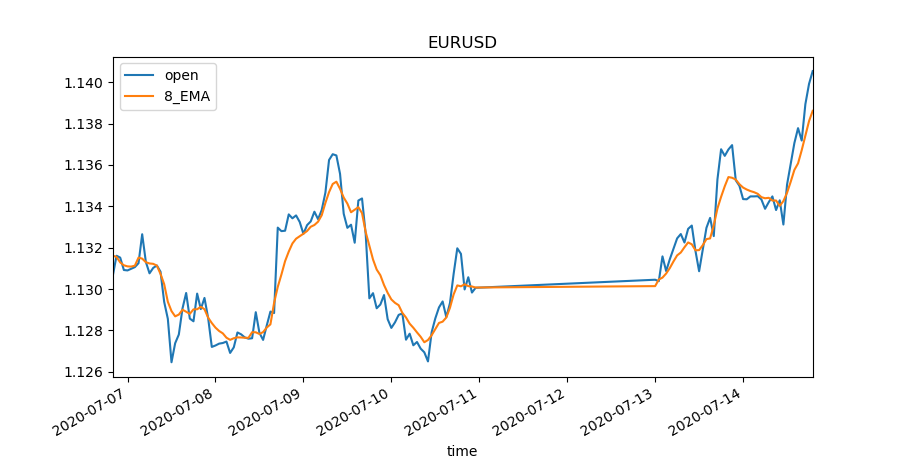

In [8]:
# plotting EWM & real values

eurusd['8_EMA'] = eurusd['close'].ewm(span=8).mean()
# ax = eurusd['8_EMA'].plot(legend=True)
# ax2 = eurusd['close'].plot(legend=True)
eurusd.plot(y=['open', '8_EMA'], title='EURUSD', legend=True)
plt.show()

### # EWM methods

In [13]:
k.ewm(span=2).std()

0         NaN
1    0.707107
2    0.919866
3    1.059753
4    1.141624
5    2.438714
dtype: float64

In [21]:
k.ewm(span=2).var()

0         NaN
1    0.500000
2    0.846154
3    1.123077
4    1.303306
5    5.947325
dtype: float64

In [20]:
kd = k * 10
k.ewm(span=3).corr(other=kd)

0    NaN
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
dtype: float64

In [22]:
k.ewm(span=2).cov(other=k*6)

0          NaN
1     3.000000
2     5.076923
3     6.738462
4     7.819835
5    35.683952
dtype: float64